In [339]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [340]:
agri_train = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Agriculture/train_agriculture.csv")
agri_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [341]:
agri_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [342]:
agri_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated_Insects_Count,4599.0,1363.000435,814.439120,150.0,731.0,1212.0,1786.0,4097.0
Crop_Type,4599.0,0.224831,0.417517,0.0,0.0,0.0,0.0,1.0
Soil_Type,4599.0,0.476625,0.499508,0.0,0.0,0.0,1.0,1.0
Pesticide_Use_Category,4599.0,2.283540,0.471978,1.0,2.0,2.0,3.0,3.0
Number_Doses_Week,4599.0,26.477495,15.524647,0.0,15.0,20.0,40.0,95.0
Number_Weeks_Used,4157.0,28.891027,12.586005,0.0,20.0,28.0,38.0,66.0
Number_Weeks_Quit,4599.0,9.205479,9.713253,0.0,0.0,7.0,16.0,47.0
Season,4599.0,1.894325,0.694952,1.0,1.0,2.0,2.0,3.0
Crop_Damage,4599.0,0.194390,0.454597,0.0,0.0,0.0,0.0,2.0


In [343]:
agri_train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

There are 442 null values in the column Number_Weeks_Used. Replacing them with mean

In [344]:
agri_train.fillna(value = agri_train['Number_Weeks_Used'].mean(), inplace = True)
agri_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.000000,0,1,0
1,F00000003,209,1,0,1,0,0.000000,0,2,1
2,F00000004,257,1,0,1,0,0.000000,0,2,1
3,F00000005,257,1,1,1,0,0.000000,0,2,1
4,F00000006,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,28.891027,1,1,1
4595,F00008079,2139,0,1,2,30,47.000000,2,1,1
4596,F00008080,2267,0,1,2,10,7.000000,27,2,0
4597,F00008082,2267,0,1,2,10,20.000000,24,2,0


In [345]:
agri_train.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

Dropping the ID column as it's irrelevant i prediction

In [346]:
agri_train.drop('ID', axis =1, inplace = True)
agri_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


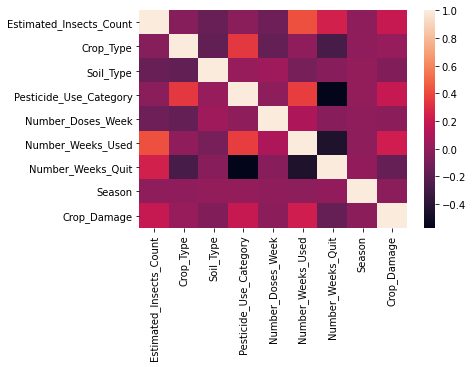

In [347]:
sns.heatmap(agri_train.corr())

Features has decent correlation with crop damage

In [348]:
agri_train['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017949426E20>,
      dtype=object)

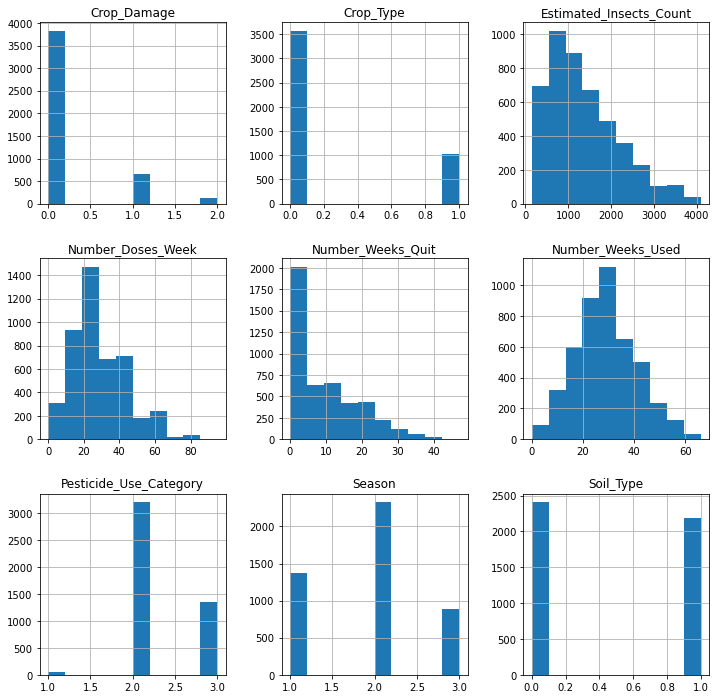

In [349]:
agri_train.hist(figsize = (12,12))

Estimated_Insects_Count        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Crop_Type                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Soil_Type                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Pesticide_Use_Category      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Number_Doses_Week             AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number_Weeks_Used          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number_Weeks_Quit          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Season                     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Crop_Damage                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

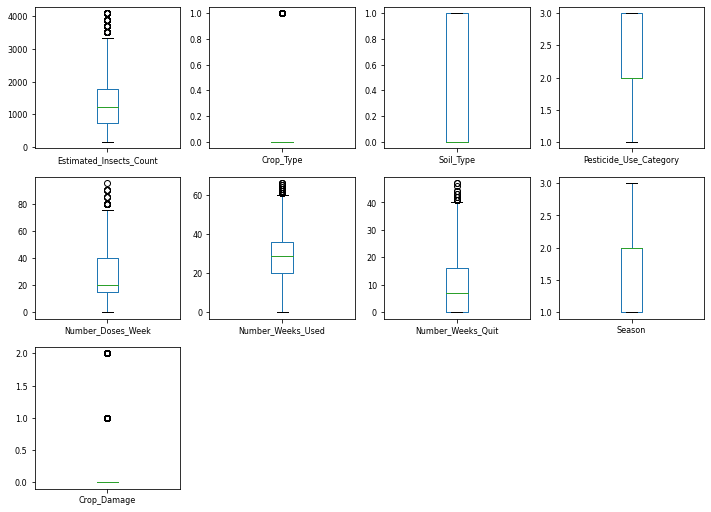

In [350]:
agri_train.plot(kind = 'box', subplots = True, layout = (4,4), fontsize = 8, figsize = (12,12))

No significant outliers

In [351]:
from sklearn.preprocessing import StandardScaler

In [352]:
Y = agri_train["Crop_Damage"]
X = agri_train.drop('Crop_Damage', axis = 1)

In [353]:
Y = Y.values.reshape(-1,1)
Y.shape

(4599, 1)

Making X into similar range

In [354]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7
0,-1.442868,1.856819,-0.954294,-2.719788,-1.705699,-2.414732e+00,-0.947827,-1.287027
1,-1.417081,1.856819,-0.954294,-2.719788,-1.705699,-2.414732e+00,-0.947827,0.152078
2,-1.358138,1.856819,-0.954294,-2.719788,-1.705699,-2.414732e+00,-0.947827,0.152078
3,-1.358138,1.856819,1.047895,-2.719788,-1.705699,-2.414732e+00,-0.947827,0.152078
4,-1.253760,1.856819,-0.954294,-2.719788,-1.705699,-2.414732e+00,-0.947827,0.152078
...,...,...,...,...,...,...,...,...
4594,0.951678,-0.538556,1.047895,-0.600814,-0.417285,5.938766e-16,-0.844863,-1.287027
4595,0.952906,-0.538556,1.047895,-0.600814,0.226922,1.513561e+00,-0.741900,-1.287027
4596,1.110086,-0.538556,1.047895,-0.600814,-1.061492,-1.829668e+00,1.832183,0.152078
4597,1.110086,-0.538556,1.047895,-0.600814,-1.061492,-7.431183e-01,1.523293,0.152078


In [355]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [356]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 270)

# DecisionTree

In [357]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc.score(X_train, Y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(Y_test, preddtc))
print(confusion_matrix(Y_test, preddtc))
print(classification_report(Y_test, preddtc))

0.7231884057971014
[[944 189  31]
 [117  53  21]
 [ 13  11   1]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1164
           1       0.21      0.28      0.24       191
           2       0.02      0.04      0.03        25

    accuracy                           0.72      1380
   macro avg       0.37      0.38      0.37      1380
weighted avg       0.77      0.72      0.75      1380



In [358]:
print('Mean absolute error:', mean_absolute_error(Y_test, preddtc))
print('Mean squared error:', mean_squared_error(Y_test, preddtc))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, preddtc)))
print('R2 score is:', r2_score(Y_test, preddtc))

Mean absolute error: 0.30869565217391304
Mean squared error: 0.372463768115942
Root Mean squared error: 0.6102980977489132
R2 score is: -1.0649841775376347


# KNeighbors

In [359]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)
predknn = knn.predict(X_test)
print(accuracy_score(Y_test, predknn))
print(confusion_matrix(Y_test, predknn))
print(classification_report(Y_test, predknn))

0.8202898550724638
[[1093   70    1]
 [ 152   39    0]
 [  17    8    0]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1164
           1       0.33      0.20      0.25       191
           2       0.00      0.00      0.00        25

    accuracy                           0.82      1380
   macro avg       0.40      0.38      0.38      1380
weighted avg       0.78      0.82      0.80      1380



In [360]:
print('Mean absolute error:', mean_absolute_error(Y_test, predknn))
print('Mean squared error:', mean_squared_error(Y_test, predknn))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predknn)))
print('R2 score is:', r2_score(Y_test, predknn))

Mean absolute error: 0.1927536231884058
Mean squared error: 0.21884057971014492
Root Mean squared error: 0.467803997107918
R2 score is: -0.21327864127697604


# SVC

In [361]:
svck = SVC(kernel = 'poly')
svck.fit(X_train, Y_train)
svck.score(X_train, Y_train)
predsvck = svck.predict(X_test)
print(accuracy_score(Y_test, predsvck))
print(confusion_matrix(Y_test, predsvck))
print(classification_report(Y_test, predsvck)) 

0.8485507246376811
[[1162    2    0]
 [ 182    9    0]
 [  23    2    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1164
           1       0.69      0.05      0.09       191
           2       0.00      0.00      0.00        25

    accuracy                           0.85      1380
   macro avg       0.51      0.35      0.34      1380
weighted avg       0.81      0.85      0.79      1380



In [362]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvck))
print('Mean squared error:', mean_squared_error(Y_test, predsvck))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvck)))
print('R2 score is:', r2_score(Y_test, predsvck))

Mean absolute error: 0.1681159420289855
Mean squared error: 0.20144927536231885
Root Mean squared error: 0.4488310098047135
R2 score is: -0.11685914660595809


In [363]:
svcr = SVC(kernel = 'rbf')
svcr.fit(X_train, Y_train)
svcr.score(X_train, Y_train)
predsvcr = svcr.predict(X_test)
print(accuracy_score(Y_test, predsvcr))
print(confusion_matrix(Y_test, predsvcr))
print(classification_report(Y_test, predsvcr)) 

0.8492753623188406
[[1159    5    0]
 [ 178   13    0]
 [  21    4    0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1164
           1       0.59      0.07      0.12       191
           2       0.00      0.00      0.00        25

    accuracy                           0.85      1380
   macro avg       0.48      0.35      0.35      1380
weighted avg       0.80      0.85      0.79      1380



In [364]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvcr))
print('Mean squared error:', mean_squared_error(Y_test, predsvcr))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvcr)))
print('R2 score is:', r2_score(Y_test, predsvcr))

Mean absolute error: 0.16594202898550725
Mean squared error: 0.1963768115942029
Root Mean squared error: 0.4431442333983405
R2 score is: -0.08873679399357792


SVC rbf gives better performance

In [365]:
predsvcr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [366]:
damage = pd.DataFrame(data = predsvcr, columns = ['Crop_Damage'])
damage

,Crop_Damage
0,0
1,0
2,0
3,0
4,0
...,...
1375,0
1376,0
1377,0
1378,0


In [369]:
import pickle
filename = 'agri_svcr.pkl'
pickle.dump(svcr, open(filename, 'wb'))

In [370]:
agri_test = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Agriculture/test_agriculture.csv")
agri_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [371]:
agri_test.drop('ID', axis = 1, inplace = True)

In [372]:
X_test = agri_test
X_test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1
1197,1212,0,1,2,10,35.0,5,1


In [373]:
X_test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [374]:
X_test.fillna(value = X_test['Number_Weeks_Used'].mean(), inplace = True)
X_test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.033333,0,2
1,410,1,1,1,0,0.000000,0,2
2,626,1,0,1,0,0.000000,0,2
3,731,1,0,1,0,0.000000,0,2
4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.000000,7,3
1195,1132,0,1,2,40,25.000000,3,1
1196,1132,0,1,2,20,13.000000,23,1
1197,1212,0,1,2,10,35.000000,5,1


In [375]:
X_test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [376]:
predsvcr = svcr.predict(X_test)
predsvcr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [377]:
damage_test = pd.DataFrame(data = predsvcr, columns = ['Crop_Damage'])
damage_test

,Crop_Damage
0,0
1,0
2,0
3,0
4,0
...,...
1194,0
1195,0
1196,0
1197,0


Not sure if this is how we display output...